In [1]:
# cmd
# c:\Files\Continuum\anaconda3\Scripts\>
# ##anaconda search -t conda xgboost
# ##conda install -c mndrake xgboost
# conda install -c anaconda py-xgboost
# conda install -c conda-forge lightgbm

In [1]:
import pandas
from pandas.plotting               import scatter_matrix            
import matplotlib.pyplot                                            
from sklearn                       import model_selection           
from sklearn.metrics               import classification_report     
from sklearn.metrics               import confusion_matrix          
from sklearn.metrics               import accuracy_score            
from sklearn.linear_model          import LogisticRegression        
from sklearn.tree                  import DecisionTreeClassifier    
from sklearn.ensemble              import RandomForestClassifier    
from sklearn.neighbors             import KNeighborsClassifier      
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB                
from sklearn.svm                   import SVC                       

from pandas.plotting               import scatter_matrix             as pandas__plotting__scatter_matrix
import matplotlib.pyplot                                             as matplotlib__pyplot # plt
from sklearn                       import model_selection            as sklearn__model_selection
from sklearn.metrics               import classification_report      as sklearn__metrics__classification_report     
from sklearn.metrics               import confusion_matrix           as sklearn__metrics__confusion_matrix          
from sklearn.metrics               import accuracy_score             as sklearn__metrics__accuracy_score            
from sklearn.linear_model          import LogisticRegression         as sklearn__linear_model__LogisticRegression        
from sklearn.tree                  import DecisionTreeClassifier     as sklearn__tree__DecisionTreeClassifier    
from sklearn.ensemble              import RandomForestClassifier     as sklearn__ensemble__RandomForestClassifier    
from sklearn.neighbors             import KNeighborsClassifier       as sklearn__neighbors__KNeighborsClassifier      
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as sklearn__discriminant_analysis__LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB                 as sklearn__naive_bayes__GaussianNB                
from sklearn.svm                   import SVC                        as sklearn__svm__SVC                       

from xgboost                       import XGBClassifier
import lightgbm
# help(lightgbm) # shift-tab

In [2]:
# help(pandas)
# help(pandas.read_csv)
# help(pandas.plotting)

In [3]:
# load iris dataset
# format is 5x150 array = (X[0:3],y)[0:149]

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
url = "file:///C:/Users/pminnis/Documents/machine%20learning%20class%20-%20chris%20himmel/iris.csv"
iris_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_dataset = pandas.read_csv(url, names=iris_names)
print('iris_dataset[0:5]:\n',iris_dataset[0:5])

# shape
print("Shape: ",iris_dataset.shape,"\n")

# head
print("First records of data:\n ",iris_dataset.head(),"\n")

# class distribution
print(iris_dataset.groupby('class').size())

iris_dataset[0:5]:
    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [4]:
import numpy
#help(numpy.hstack)

In [5]:
# descriptions
print("Statistical description of data:\n",iris_dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


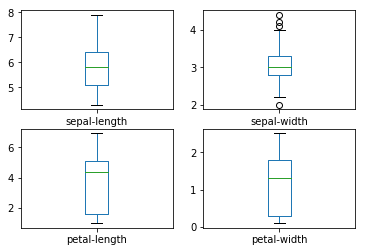

In [6]:
iris_dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
matplotlib__pyplot.show()

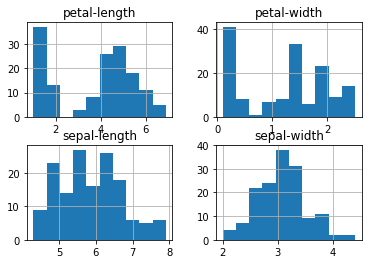

In [7]:
iris_dataset.hist()
matplotlib__pyplot.show()

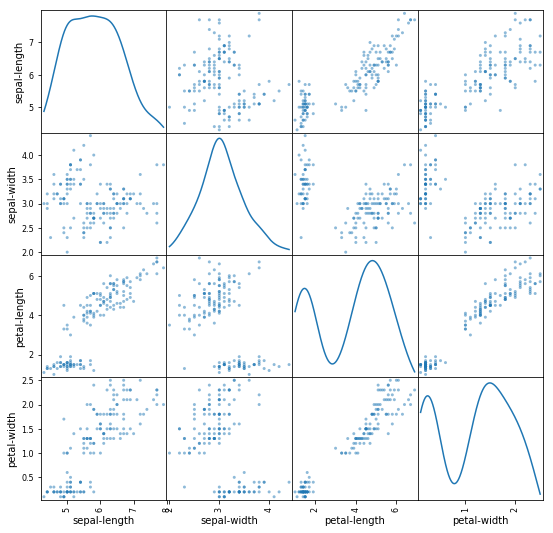

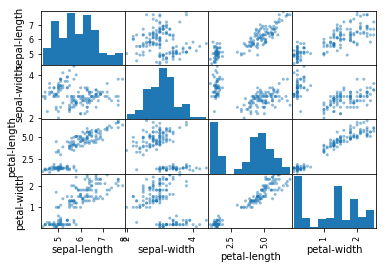

In [8]:
pandas__plotting__scatter_matrix( 
                frame    = iris_dataset
            # , alpha    = 0.5   # amount of transparency applied
              , figsize  = [9,9] # a tuple (width, height) in inches
            # , ax       = None  #  Matplotlib axis object
            # , grid     = True  # setting this to True will show the grid
              , diagonal = 'kde' # 'kde' = Kernel Density Estimation; 'hist' = Histogram; for plot in the diagonal
            # , marker   = '.'   # Matplotlib marker type
            # , hist_kwds =      # other plotting keyword arguments to be passed to hist function
            # , density_kwds =   # other plotting keyword arguments to be passed to kernel density estimate plot
            # , range_padding =  # relative extension of axis range in x and y with respect to (x_max - x_min) or (y_max - y_min), default 0.05
            # , kwds =           # other plotting keyword argumentst o be passed to scatter function
              )
matplotlib__pyplot.show()
pandas__plotting__scatter_matrix(iris_dataset)
matplotlib__pyplot.show()

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
class


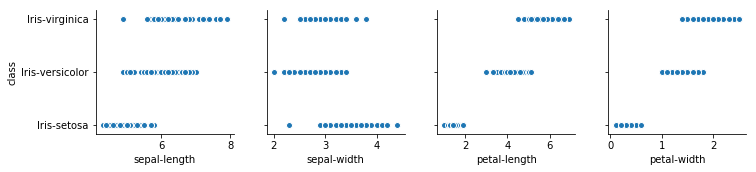

In [9]:
# import numpy
# import scipy
# import matplotlib
# import pandas
# import statsmodels
import seaborn as sns # conventional way to import seaborn
# allow plots to appear within the notebook
%matplotlib inline

print(iris_dataset[0:5])
print(iris_names[0:len(iris_names)-1])
print(iris_names[len(iris_names)-1])
sns.pairplot(iris_dataset, x_vars=iris_names[0:len(iris_names)-1], y_vars=iris_names[len(iris_names)-1])
# sns.pairplot(iris_dataset, x_vars=iris_names[0:len(iris_names)-1], y_vars=iris_names[len(iris_names)-1], size=7, aspect=0.7, kind='reg')

In [10]:
# divide X,y into train,test
#   iris_dataset -> X,y
#                -> sklearn__model_selection()
#                -> X_train, X_validation, Y_train, Y_validation

array = iris_dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = sklearn__model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)
print("X=\n",X[0:5])
print("Y=\n",Y[0:5])
print("X_train=\n",X_train[0:5])
print("X_validation=\n",X_validation[0:5])
print("Y_train=\n",Y_train[0:5])
print("Y_validation=\n",Y_validation[0:5])

X=
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
Y=
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
X_train=
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]]
X_validation=
 [[5.9 3.0 5.1 1.8]
 [5.4 3.0 4.5 1.5]
 [5.0 3.5 1.3 0.3]
 [5.6 3.0 4.5 1.5]
 [4.9 2.5 4.5 1.7]]
Y_train=
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']
Y_validation=
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica']


In [11]:
# review hyperparameters
# help(LogisticRegression)
# help(LinearDiscriminantAnalysis)
# help(KNeighborsClassifier)
# help(DecisionTreeClassifier)
# help(RandomForestClassifier)
# help(GaussianNB)
# help(SVC)
# help(XGBClassifier)
# help(lightgbm)

In [12]:
# create array of models()

models = []
models.append(('LR-l2',         LogisticRegression()))
models.append(('LR-l1',         LogisticRegression(penalty='l1')))
models.append(('LDA-svd',       LinearDiscriminantAnalysis()))
models.append(('LDA-lsqr',      LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('KNN-auto',      KNeighborsClassifier()))
models.append(('KNN-ball_tree', KNeighborsClassifier(algorithm='ball_tree')))
models.append(('KNN-brute',     KNeighborsClassifier(algorithm='brute')))
models.append(('CART-gini',     DecisionTreeClassifier()))
models.append(('CART-entropy',  DecisionTreeClassifier(criterion='entropy')))
models.append(('RF-gini',       RandomForestClassifier()))
models.append(('RF-entropy',    RandomForestClassifier(criterion='entropy')))
models.append(('NB-priorless',  GaussianNB()))
# models.append(('NB-priors',   GaussianNB(priors=[0.1, 0.9]))) # does NOT work
models.append(('SVM-rbf',       SVC()))
models.append(('SVM-sigmoid',   SVC(kernel='sigmoid')))
models.append(('XGBClassifier', XGBClassifier()))
# models.append(('LightGBM',    lightgbm.train()))
# models.append(('LightGBM',    LGBMClassifier()))
models.append(('LightGBM',      lightgbm.sklearn.LGBMClassifier()))

for model in models:
    print(model)

('LR-l2', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('LR-l1', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('LDA-svd', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))
('LDA-lsqr', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=False, tol=0.0001))
('KNN-auto', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, 

In [13]:
help(sklearn__model_selection.KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomState instance used
 |      by `np.random`. Used when

In [14]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# X_train,y_train -> model() x KFold()
#                 -> cross_val_score

for name, model in models:
    kfold = sklearn__model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = sklearn__model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR-l2: 0.966667 (0.040825)
LR-l1: 0.958333 (0.041667)
LDA-svd: 0.975000 (0.038188)
LDA-lsqr: 0.975000 (0.038188)
KNN-auto: 0.983333 (0.033333)
KNN-ball_tree: 0.983333 (0.033333)
KNN-brute: 0.983333 (0.033333)
CART-gini: 0.983333 (0.033333)
CART-entropy: 0.975000 (0.038188)
RF-gini: 0.966667 (0.040825)
RF-entropy: 0.975000 (0.038188)
NB-priorless: 0.975000 (0.053359)
SVM-rbf: 0.991667 (0.025000)
SVM-sigmoid: 0.358333 (0.065085)


C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

XGBClassifier: 0.975000 (0.038188)


C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

LightGBM: 0.941667 (0.053359)


C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


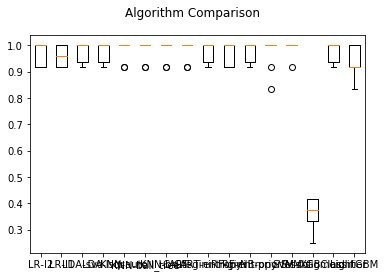

In [15]:
fig = matplotlib__pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
matplotlib__pyplot.boxplot(results)
ax.set_xticklabels(names)
matplotlib__pyplot.show()

In [16]:
# X_train,y_train -> KNeighborsClassifier().fit
# X_validation    -> KNeighborsClassifier().predict
#                 -> y_prediction
# y_validation vs y_pediction
#                 -> accuracy_score & confusion_matrix & classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_prediction = knn.predict(X_validation)

print('-'*8)
print('KNeighborsClassifier:')
print('--accuracy_score--')
print(accuracy_score(Y_validation, y_prediction))
print('--confusion_matrix--')
print(confusion_matrix(Y_validation, y_prediction))
print('--classification_report--')
print(classification_report(Y_validation, y_prediction))
print('-'*8)

--------
KNeighborsClassifier:
--accuracy_score--
0.9
--confusion_matrix--
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
--classification_report--
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

--------


In [17]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print('-'*8)
print('SVC:')
print('--accuracy_score--')
print(accuracy_score(Y_validation, predictions))
print('--confusion_matrix--')
print(confusion_matrix(Y_validation, predictions))
print('--classification_report--')
print(classification_report(Y_validation, predictions))
print('-'*8)

--------
SVC:
--accuracy_score--
0.9333333333333333
--confusion_matrix--
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
--classification_report--
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

--------


In [18]:
for name,model in models:
    test = model
    test.fit(X_train, Y_train)
    predictions = test.predict(X_validation)
    print('-'*8)
    print(name+':')
    print('--accuracy_score--')
    print(accuracy_score(Y_validation, predictions))
    print('--confusion_matrix--')
    print(confusion_matrix(Y_validation, predictions))
    print('--classification_report--')
    print(classification_report(Y_validation, predictions))
    print('-'*8)

--------
LR-l2:
--accuracy_score--
0.8
--confusion_matrix--
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
--classification_report--
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30

--------
--------
LR-l1:
--accuracy_score--
0.8
--confusion_matrix--
[[7 0 0]
 [0 8 4]
 [0 2 9]]
--classification_report--
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.80      0.67      0.73        12
 Iris-virginica       0.69      0.82      0.75        11

    avg / total       0.81      0.80      0.80        30

--------
--------
LDA-svd:
--accuracy_score--
0.9666666666666667
--confusion_matrix--
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
--classification_report--
                 precision   

C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Files\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
